### Filling Factor
- **ν**: Filling factor 1/2
- **Nk**: Number of k-points must be multiple of denominator for commensurability
- **Ne = Nk * ν**: Number of electrons

### Key Physics
- **Ground state competition**: in n=0 Landau level, competition between pfaffin-related states and composite Fermi liquids; in n=1 Landau level, Moore-Read states are the ground states.

In [1]:
# These packages are not included in the MomentumED package. 
# Use the following line to add them:
# using Pkg; Pkg.add("CairoMakie"); Pkg.add("QuadGK"); Pkg.add("ClassicalOrthogonalPolynomials")

# Import the momentum-conserved exact diagonalization package
using MomentumED
include("Landau level triangular.jl")
using .LLT

using CairoMakie # for plotting
CairoMakie.activate!()

# Plot the energy spectrum
function plot_ed_spectrum()
    fig = Figure();
    ax = Axis(fig[1, 1];
        xlabel = "$(Gk[2])k1+k2",
        ylabel = "Energy per unit cell (W₀ = e²/ϵl)"
    )
    ax_top = Axis(fig[1, 1];
        xlabel = "momentum block number",
        xaxisposition = :top
    )
    top_ticks = ([], [])
    hidespines!(ax_top)
    hidexdecorations!(ax_top; label = false, ticklabels = false)
    hideydecorations!(ax_top)
    linkxaxes!(ax, ax_top)

    # Plot energy levels for each momentum block
    for i in 1:length(blocks)
        x = Gk[2] * block_k1[i] + block_k2[i]
        push!(top_ticks[1], x)
        push!(top_ticks[2], string(i))
        for e in energies[i]
            scatter!(ax, x, e/Nk/LLT.W0, color = :blue, marker=:hline)
        end
    end
    ax_top.xticks = top_ticks
    fig
end

plot_ed_spectrum (generic function with 1 method)

In [3]:
# Define 4×4 k-mesh (Nk=16) 

#=

k_list = [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3;
          0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]

# System parameters
Nk = 16         # Total number of k-points
Gk = (4, 4)     # Grid dimensions (G1_direction, G2_direction)
Ne = 8          # Ne electrons for this system, Ne=8 for 1/2 filling

=#

In [2]:
# Define 3×6 k-mesh (Nk=18) 

#

k_list = [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2;
          0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5]

# System parameters
Nk = 18         # Total number of k-points
Gk = (3, 6)     # Grid dimensions (G1_direction, G2_direction)
Ne = 9          # Ne electrons for this system

#

9

In [2]:
# Define 4×5 k-mesh (Nk=20) 
k_list = [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3;
          0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]

# System parameters
Nk = 20         # Total number of k-points
Gk = (4, 5)     # Grid dimensions (G1_direction, G2_direction)
Ne = 5          # Ne electrons for this system

5

In [ ]:
# Define 4×6 k-mesh (Nk=24) 

#=

k_list = [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3;
          0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6]

# System parameters
Nk = 24         # Total number of k-points
Gk = (4, 6)     # Grid dimensions (G1_direction, G2_direction)
Ne = 12          # Ne electrons for this system

=#

In [3]:
using MomentumED: Scattering
using LinearAlgebra
function pseudopotential(m::Int64)::Vector{Scattering{2}}
    LLT.W0 = 1.0
    LLT.V_intra = [fill(0.0, m); 1.0]

    para = EDPara(k_list = k_list, Gk = Gk, 
        V_int = LLT.LandauInteraction(interaction = :Haldane, layer_number = 1, level_index = 0)
    );
    scat = ED_sortedScatteringList_twobody(para);
    return scat
end

m_list = 0:20
pseudopotentials = Vector{Vector{Scattering{2}}}(undef, length(m_list))
for i in eachindex(m_list)
    pseudopotentials[i] = pseudopotential(m_list[i])
end

In [4]:
# use Haldane pseudopotential
LLT.W0 = 1.0
LLT.V_intra = [0.0; 1.0]                   # coefficients in unit of W0

# show the pseudopotential decomposition of the gate-screened Coulomb interaction for reference
LLT.D_l = 5.0                              # gate distance / magnetic length 
show( LLT.pseudo_potential_decomposition.(0:10, d_l = 0.0) )
# LLT.V_intra = LLT.pseudo_potential_decomposition.(0:10; d_l = 0.0)

para = EDPara(k_list = k_list, Gk = Gk, 
    V_int = LLT.LandauInteraction(interaction = :Haldane, layer_number = 1, level_index = 0),
    FF_inf_angle = LLT.Landau_ff_inf
);

[1.501982636440383, 0.6221557340393984, 0.40664424293836865, 0.30158556536371806, 0.23776931630752113, 0.19444791767975755, 0.1629877940798242, 0.13908056457052326, 0.12030920054636296, 0.10520165028815111, 0.09280505933768239]

In [5]:
show( MomentumED.Combinatorics.binomial(Nk, Ne) / Nk)
blocks, block_k1, block_k2, k0number = 
    ED_momentum_block_division(para, ED_mbslist(para, (Ne,)));
# one-body terms are all zero in flat Landau level
scat = ED_sortedScatteringList_twobody(para);

2701.1111111111113

In [14]:
@show length(blocks[1]);
@show sizeof(blocks[1]);

length(blocks[1]) = 2710
sizeof(blocks[1]) = 21680


In [11]:
dump(blocks[1])

Array{MomentumED.MBS64{18}}((2710,)) MomentumED.MBS64{18}[MBS64: 1022 = 011111111100000000 (18 bits), MBS64: 1533 = 101111111010000000 (18 bits), MBS64: 1759 = 111110110110000000 (18 bits), MBS64: 1911 = 111011101110000000 (18 bits), MBS64: 1967 = 111101011110000000 (18 bits), MBS64: 2555 = 110111111001000000 (18 bits), MBS64: 2807 = 111011110101000000 (18 bits), MBS64: 2927 = 111101101101000000 (18 bits), MBS64: 2975 = 111110011101000000 (18 bits), MBS64: 3311 = 111101110011000000 (18 bits)  …  MBS64: 258188 = 001100010000111111 (18 bits), MBS64: 258194 = 010010010000111111 (18 bits), MBS64: 258209 = 100001010000111111 (18 bits), MBS64: 258314 = 010100001000111111 (18 bits), MBS64: 258321 = 100010001000111111 (18 bits), MBS64: 258340 = 001001001000111111 (18 bits), MBS64: 258566 = 011000000100111111 (18 bits), MBS64: 259077 = 101000000010111111 (18 bits), MBS64: 260099 = 110000000001111111 (18 bits), MBS64: 261632 = 000000000111111111 (18 bits)]


In [10]:
dump(mapping)

Dict{MomentumED.MBS64{18}, Int64}
  slots: Memory{UInt8}
    length: Int64 4096
    ptr: Ptr{Nothing} @0x000001d768166680
  keys: Memory{MomentumED.MBS64{18}}
    length: Int64 4096
    ptr: Ptr{Nothing} @0x000001d70fe9e040
  vals: Memory{Int64}
    length: Int64 4096
    ptr: Ptr{Nothing} @0x000001d7335e7d40
  ndel: Int64 0
  count: Int64 2710
  age: UInt64 0x0000000000000a9f
  idxfloor: Int64 1
  maxprobe: Int64 46


In [20]:
Neigen = 10  # Number of eigenvalues to compute per block
energies = Vector{Vector{Float64}}(undef, length(blocks))
vectors = Vector{Vector{Vector{ComplexF64}}}(undef, length(blocks))
for i in eachindex(blocks)
    println("Processing block #$i with size $(length(blocks[i])), momentum $(block_k1[i]), $(block_k2[i])")
    energies[i], vectors[i] = EDsolve(blocks[i], scat; N = Neigen,
        showtime=true
    )
end

Processing block #1 with size 1032, momentum 0, 0
  0.275811 seconds (2.05 M allocations: 50.266 MiB, 6.09% gc time, 467.53% compilation time)
  0.063555 seconds (6.02 k allocations: 11.939 MiB, 20.40% gc time)
Processing block #2 with size 1035, momentum 0, 1
  0.066944 seconds (1.92 M allocations: 43.577 MiB, 6.51% gc time)
  0.062840 seconds (6.03 k allocations: 11.983 MiB)
Processing block #3 with size 1026, momentum 0, 2
  0.095086 seconds (1.90 M allocations: 43.085 MiB, 7.75% gc time)
  0.066491 seconds (4.75 k allocations: 9.368 MiB)
Processing block #4 with size 1044, momentum 0, 3
  0.278022 seconds (1.94 M allocations: 44.238 MiB, 72.01% gc time)
  0.034397 seconds (5.31 k allocations: 10.555 MiB)
Processing block #5 with size 1026, momentum 0, 4
  0.066720 seconds (1.90 M allocations: 43.081 MiB)
  0.063484 seconds (7.24 k allocations: 14.381 MiB)
Processing block #6 with size 1035, momentum 0, 5
  0.077853 seconds (1.92 M allocations: 43.576 MiB, 14.22% gc time)
  0.043699

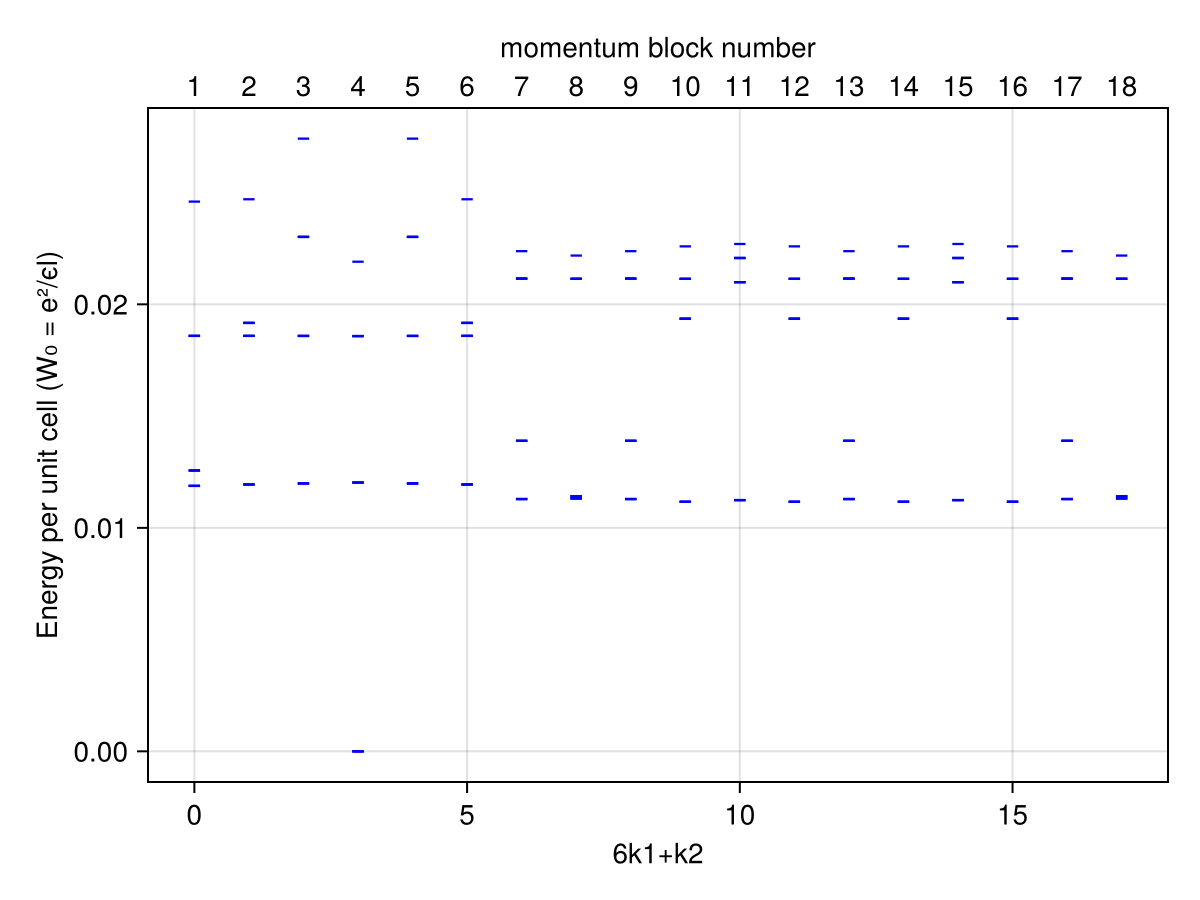

In [21]:
plot_ed_spectrum()

In [23]:
# check energies explicitly to see degeneracy.

bn = 4 # the block number to inspect
println("total momentum: ", block_k1[bn], "  ", block_k2[bn])
energies[bn]/Nk/LLT.W0

total momentum: 0  3


10-element Vector{Float64}:
 -5.075092220576704e-14
 -3.6816247252816334e-14
 -3.581697138508138e-14
  0.012027181551243504
  0.01202718155124912
  0.012027181551260827
  0.018581215787552074
  0.018581215787559252
  0.01858121578756362
  0.021908312136432073

Compute and plot one-body reduced density matrix

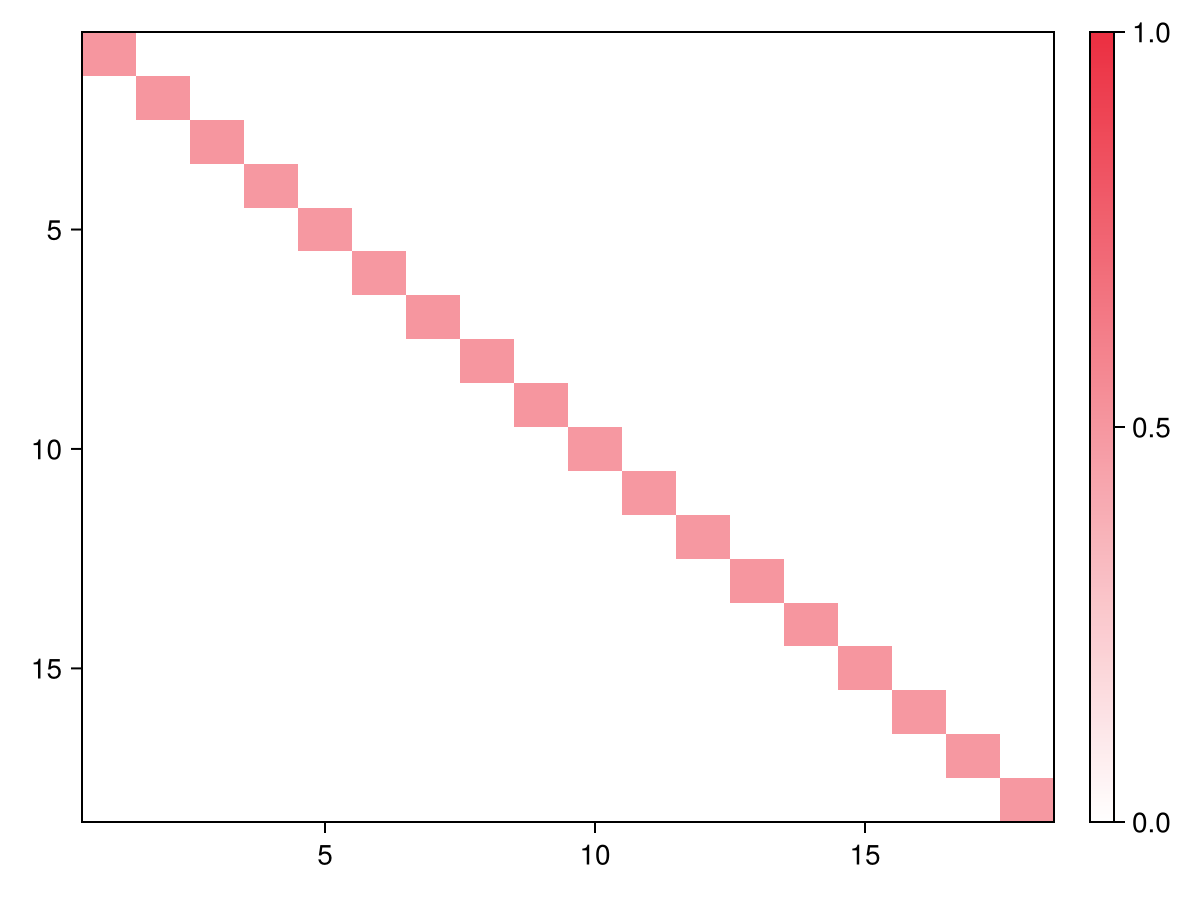

In [31]:
# plot the one-body reduced density matrix of the ground eigenstate in the first block
rdm = ED_onebody_rdm(blocks[bn], vectors[bn][1])

fig = Figure();
ax = Axis(fig[1, 1]; yreversed = true)
hm = heatmap!(ax, abs.(rdm); colorrange = (0,1), 
    colormap = range(Makie.Colors.colorant"white", stop=Makie.Colors.colorant"#ec2f41", length=15)
)
Colorbar(fig[1, 2], hm)
fig

Compute the expectation values of pseudo-potentials of angular momemta m

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21   6.593801 seconds (41.41 M allocations: 2.316 GiB, 9.65% gc time, 1.51% compilation time)


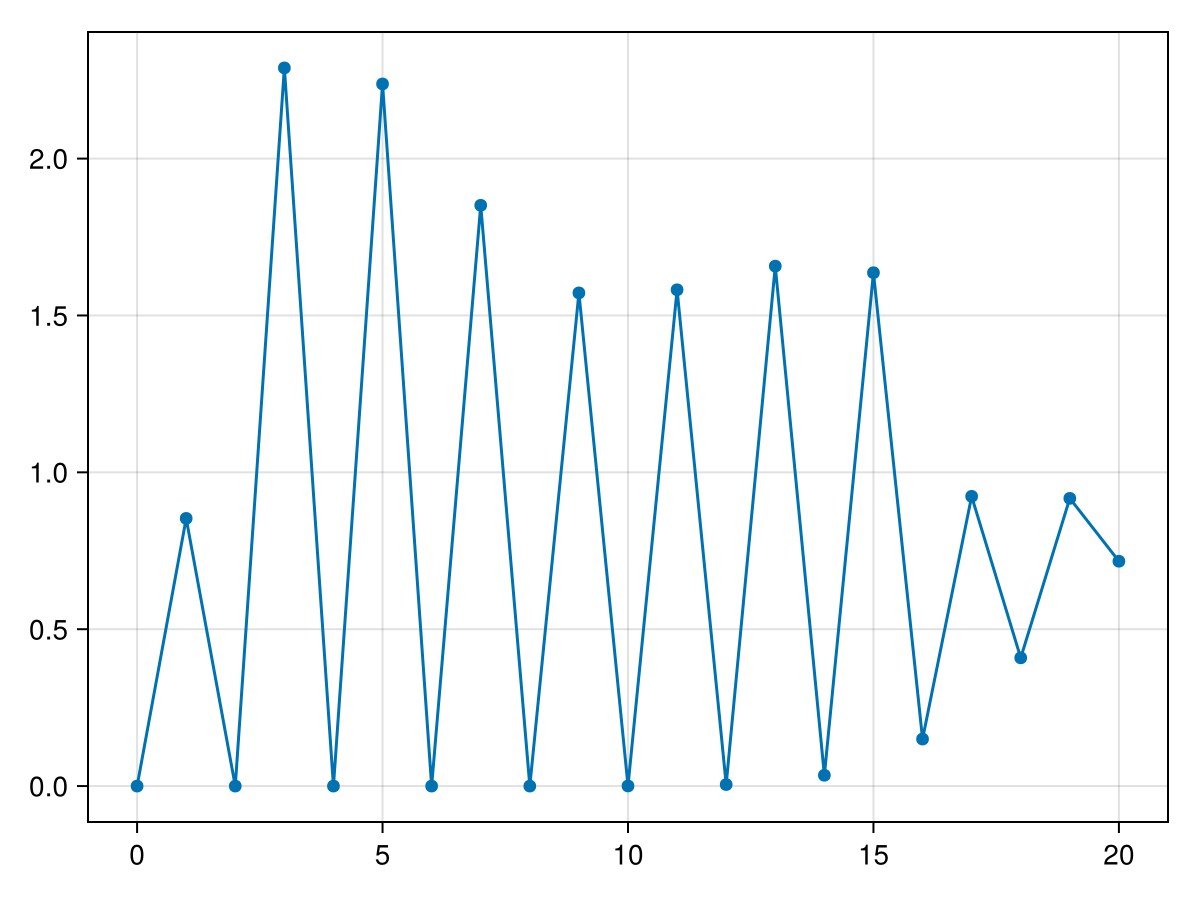

In [24]:
bn = 4
vec = vectors[bn][1]
mapping = MomentumED.create_state_mapping(blocks[bn])

E_m = zeros(Float64, length(m_list))
@time for i in eachindex(m_list)
    print(i, ' ')
    for s in pseudopotentials[i]
        E_m[i] += vec ⋅ ED_apply(s, vec, blocks[bn], check_in_space = true) |> real
        # E_m[i] += vec ⋅ ED_apply(s, vec, mapping, check_in_space = true) |> real
        # E_m[i] += ED_expt(s, vec blocks[bn], check_in_space = true) |> real
        # E_m[i] += ED_expt(s, vec, mapping, check_in_space = true) |> real
    end
end
scatterlines(m_list, E_m)

In [25]:
pseudopotentials[2]

729-element Vector{Scattering{2}}:
 2-body scattering: c†_out (2, 1) c_in (1, 2), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (3, 1) c_in (1, 3), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (3, 2) c_in (2, 3), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (4, 1) c_in (1, 4), Amp = 0.037173236150029515 + 0.0im
 2-body scattering: c†_out (4, 2) c_in (2, 4), Amp = 0.1480150573637524 + 0.0im
 2-body scattering: c†_out (4, 3) c_in (3, 4), Amp = 0.0927287910832476 + 0.0im
 2-body scattering: c†_out (4, 2) c_in (1, 5), Amp = -0.07583883904545712 - 0.05163462714758541im
 2-body scattering: c†_out (5, 1) c_in (1, 5), Amp = 0.09272879108324757 + 0.0im
 2-body scattering: c†_out (4, 3) c_in (2, 5), Amp = 0.03937820481903545 - 0.025130374551887182im
 2-body scattering: c†_out (5, 2) c_in (2, 5), Amp = 0.037173236150029515 + 0.0im
 ⋮
 2-body scattering: c†_out (18, 16) c_in (16, 18), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (9, 8)

In [27]:
scat

729-element Vector{Scattering{2}}:
 2-body scattering: c†_out (2, 1) c_in (1, 2), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (3, 1) c_in (1, 3), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (3, 2) c_in (2, 3), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (4, 1) c_in (1, 4), Amp = 0.037173236150029515 + 0.0im
 2-body scattering: c†_out (4, 2) c_in (2, 4), Amp = 0.1480150573637524 + 0.0im
 2-body scattering: c†_out (4, 3) c_in (3, 4), Amp = 0.0927287910832476 + 0.0im
 2-body scattering: c†_out (4, 2) c_in (1, 5), Amp = -0.07583883904545712 - 0.05163462714758541im
 2-body scattering: c†_out (5, 1) c_in (1, 5), Amp = 0.09272879108324757 + 0.0im
 2-body scattering: c†_out (4, 3) c_in (2, 5), Amp = 0.03937820481903545 - 0.025130374551887182im
 2-body scattering: c†_out (5, 2) c_in (2, 5), Amp = 0.037173236150029515 + 0.0im
 ⋮
 2-body scattering: c†_out (18, 16) c_in (16, 18), Amp = 0.11124109356688254 + 0.0im
 2-body scattering: c†_out (9, 8)

In [ ]:
H = MomentumED.HmltMatrix_threaded()

Compute the many-body connection and the Wilson loop for many-body Chern number.

In [30]:
# twist angle path for the Wilson loop integral
N_shift = 4  # number of shifts along each edge
path = Tuple{Float64, Float64}[(0.0, 0.0)]
for i in 1:N_shift
    push!(path, (i/N_shift, 0.0))
end
for i in 1:N_shift
    push!(path, (1.0, i/N_shift))
end
for i in 1:N_shift
    push!(path, ((N_shift - i)/N_shift, 1.0))
end
for i in 1:N_shift
    push!(path, (0.0, (N_shift - i)/N_shift))
end
path;

In [31]:
# If the 3 ground states are in different momentum section, 
# we can track one of them and compute its many-body Chern number

#
bn = 1
psi_before = copy(vectors[bn][1])
ED_connection_gaugefixing!(psi_before)  # fix global phase
psi_after = similar(psi_before)

WilsonLoopIntegral= Vector{Float64}(undef, 4N_shift)
for i in eachindex(WilsonLoopIntegral)

    println("path point #$i \t $(path[i+1])")

    scat_list = ED_sortedScatteringList_twobody(para; kshift = path[i+1]);
    psi_after .= EDsolve(blocks[bn], scat_list; N = 6,
        showtime = false,
    )[2][1]
    ED_connection_gaugefixing!(psi_after)  # fix global phase

    WilsonLoopIntegral[i] = ED_connection_step(blocks[bn], 
        psi_after, psi_before, path[i+1], path[i], para;
        wavefunction_tol = 1e-8, print_amp = true,
        amp_warn_tol = 0.7, amp_warn = true
    )

    psi_before .= psi_after
end
ManyBodyChernNumber = sum(WilsonLoopIntegral) / (2π)
#

path point #1 	 (0.25, 0.0)
Inner product: amp = 1.0000000000000164, phase = 0.39269908169872125
path point #2 	 (0.5, 0.0)
Inner product: amp = 1.0000000000000182, phase = 0.3926990816987193
path point #3 	 (0.75, 0.0)
Inner product: amp = 1.0000000000000162, phase = 0.3926990816987206
path point #4 	 (1.0, 0.0)
Inner product: amp = 1.000000000000015, phase = 0.39269908169872086
path point #5 	 (1.0, 0.25)
Inner product: amp = 1.0000000000000038, phase = -0.8639379797371951
path point #6 	 (1.0, 0.5)
Inner product: amp = 1.0000000000000029, phase = -0.8639379797371921
path point #7 	 (1.0, 0.75)
Inner product: amp = 1.0000000000000024, phase = -0.8639379797371949
path point #8 	 (1.0, 1.0)
Inner product: amp = 1.0000000000000047, phase = -0.8639379797371931
path point #9 	 (0.75, 1.0)
Inner product: amp = 0.9999999999999907, phase = -0.7853981633974493
path point #10 	 (0.5, 1.0)
Inner product: amp = 0.9999999999999926, phase = -0.785398163397447
path point #11 	 (0.25, 1.0)
Inner pro

-0.5000000000000028

In [17]:
# If the 3 degenerate ground states are in the same total momentum section, 
# we can only compute the sum of the tatal connection and Chern number.

#=
bn = 4
psi_before = reduce(hcat, vectors[bn][1:3])
ED_connection_gaugefixing!(psi_before)
psi_after = similar(psi_before)

using LinearAlgebra
WilsonLoopIntegral= Vector{Float64}(undef, 4N_shift)
for i in eachindex(WilsonLoopIntegral)

    println("path point #$i \t $(path[i+1])")

    if path[i+1] == (0.0, 0.0)
        psi_after. = reduce(hcat, vectors[bn][1:3])
        ED_connection_gaugefixing!(psi_after)
    else
        scat_list = ED_sortedScatteringList_twobody(para; kshift = path[i+1]);
        vecs = EDsolve(blocks[bn], scat_list; N = 10,
            showtime = false, 
        )[2][1:3]
        psi_after. = reduce(hcat, vecs)
        ED_connection_gaugefixing!(psi_after)
    end

    WilsonLoopIntegral[i] = ED_connection_step(blocks[bn],
        psi_after, psi_before, path[i+1], path[i], para;
        wavefunction_tol = 1e-8, print_amp = true,
        amp_warn_tol = 0.7, amp_warn = true
    )

    psi_before. = psi_after
end
ManyBodyChernNumber = sum(WilsonLoopIntegral) / (2π)
=#